# Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Load Data_set

In [5]:
df=pd.read_csv(rf"D:\Excel\project\Dataset MeriSKILL\LoanExport.csv")
df.head(5)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [6]:
df.tail()# last 5 values

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32
291450,849,199903,N,202902,37964,0,1,O,47,29,...,18900,F199Q1220923,P,360,2,Ot,Other servicers,0,0,29


In [7]:
df.shape# chech columns and row

(291451, 28)

In [8]:
df.columns # chech columns name

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [9]:
df.info()# show about information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

#  Data Cleaning

<Axes: >

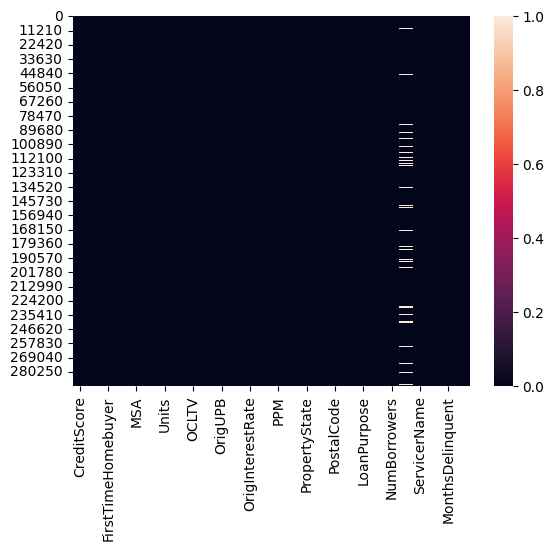

In [10]:
sns.heatmap(df.isnull())# show null values in heatmap

In [11]:
df.isnull().sum()# Check null values

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [12]:
df['SellerName'].value_counts().head(2)*# fixing null values

SellerName
Ot    76943
CO    34479
Name: count, dtype: int64

In [13]:
df.fillna({ 'SellerName': 'ot'},inplace=True)# there is no null values
df.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)# there is no duplicate value
df.shape


(291451, 28)

In [15]:
df.head(2)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144


# Data type Conversion

In [33]:
df['FirstPaymentDate']=pd.to_datetime(df['FirstPaymentDate'],format=('%Y%M'))
df['MaturityDate']=pd.to_datetime(df['MaturityDate'],format=('%Y%M'))


In [ ]:
df['PostalCode']=df['PostalCode'].astype(int)

# Performing statistical analysis

In [40]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451,291451,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,1999-01-03 11:35:41.355081984,2028-12-29 09:06:37.881701888,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
min,0.000000,1999-01-01 00:01:00,2024-01-01 00:02:00,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,1999-01-01 00:03:00,2029-01-01 00:02:00,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,1999-01-01 00:04:00,2029-01-01 00:03:00,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,1999-01-01 00:05:00,2029-01-01 00:04:00,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,2013-01-01 00:03:00,2043-01-01 00:02:00,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000
std,68.408791,NaN,NaN,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599


In [42]:
df.describe(include=object)

,FirstTimeHomebuyer,MSA,Occupancy,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,NumBorrowers,SellerName,ServicerName
count,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451,291451
unique,3,392,3,4,3,1,53,7,1767,291451,3,3,21,20
top,N,X,O,T,N,FRM,CA,SF,94500,F199Q1268030,P,2,Ot,Other servicers
freq,184154,39100,276131,167670,282125,291451,43327,244923,2582,1,123404,187335,76943,64043


# Check Outliers

In [43]:
mx = df['OrigUPB'].max()
mn = df['OrigUPB'].min()
print(mx)
print(mn)

497000
8000


## Lower Extreme and Upper Extreme:


## Let's Find Q1 and Q3 :
#### To Find Lower extreme , we must find Q1 and Q3. We will use percentile method of numpy to calculate quartiles.

In [49]:
q1,q3 = np.percentile(df['OrigUPB'],[25,75])

print(q1,q3)

83000.0 160000.0


## Let's Find Interquartile Range (IQR):

In [50]:
iqr = q3-q1
iqr

77000.0

## Let's Find Lower Extreme and Upper Extreme:

In [55]:
lx = q1 - 1.5 * iqr
ux = q3 + 1.5 * iqr
print('Lower Extreme : ',lx)
print('Upper Extreme : ',ux)

Lower Extreme :  -32500.0
Upper Extreme :  275500.0


In [60]:
outlier = df.loc[(df['OrigUPB']<ux) & (df['OrigUPB']>lx)]
ndf=outlier
ndf

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-01-01 00:03:00,N,2029-01-01 00:02:00,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,2002-01-01 00:10:00,N,2029-01-01 00:04:00,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,2003-01-01 00:04:00,N,2029-01-01 00:04:00,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,1999-01-01 00:04:00,N,2029-01-01 00:03:00,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


In [61]:
df.head(2)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-01-01 00:02:00,N,2029-01-01 00:01:00,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144


# Data Preprocessing

In [63]:
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                21
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [64]:
le_rc = LabelEncoder()
df['Occupancy']= le_rc.fit_transform(df['Occupancy'])

df['Occupancy'].unique()

array([1, 0, 2])

In [65]:
df['FirstTimeHomebuyer'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [66]:
le_Rc = LabelEncoder()
df['FirstTimeHomebuyer']= le_Rc.fit_transform(df['FirstTimeHomebuyer'])

df['FirstTimeHomebuyer'].unique()

array([0, 1, 2])

In [67]:
df['PPM'].unique()

array(['N', 'X', 'Y'], dtype=object)

In [68]:
le_ppm = LabelEncoder()
df['PPM']= le_ppm.fit_transform(df['PPM'])

df['PPM'].unique()

array([0, 1, 2])

In [69]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,16974,25,1,1,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,19740,0,1,1,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,29940,0,1,1,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,31084,0,1,1,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-01-01 00:02:00,0,2029-01-01 00:01:00,35644,0,1,1,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CreditScore         291451 non-null  int64         
 1   FirstPaymentDate    291451 non-null  datetime64[ns]
 2   FirstTimeHomebuyer  291451 non-null  int32         
 3   MaturityDate        291451 non-null  datetime64[ns]
 4   MSA                 291451 non-null  object        
 5   MIP                 291451 non-null  int64         
 6   Units               291451 non-null  int64         
 7   Occupancy           291451 non-null  int32         
 8   OCLTV               291451 non-null  int64         
 9   DTI                 291451 non-null  int64         
 10  OrigUPB             291451 non-null  int64         
 11  LTV                 291451 non-null  int64         
 12  OrigInterestRate    291451 non-null  float64       
 13  Channel             291451 no